%%bash

```
python train.py --model GCN \
                --dataset Anaheim \
                --device cuda:1 \
                --alpha 0.1 \
                --optimal \
                --num_runs 1
```

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import os

import pandas as pd

In [2]:
%matplotlib inline

In [3]:
def get_dir_res(dirname):
    gnn_results, cfgnn_results = [], []
    for fname in os.listdir(dirname):
        with open(os.path.join(dirname, fname), "rb") as f:
            res = pkl.load(f)
            splits = fname.split("_")
            alpha = 0.1
            if "alpha" in splits:
                alpha_idx = splits.index("alpha")
                alpha = float(splits[alpha_idx + 1][:-4]) # exclude .pkl

            for run_id, result in res.items():
                gnn_results.append(dict(
                    run_id=run_id,
                    alpha=alpha,
                    model="gnn",
                    **result["gnn"]
                ))
                cfgnn_results.append(dict(
                    run_id=run_id,
                    alpha=alpha,
                    model="conf_gnn",
                    **result["conf_gnn"]
                ))
    return gnn_results + cfgnn_results

new_aps_results = get_dir_res("pred/script_expt/new_aps/")
old_aps_results = get_dir_res("pred/script_expt/old_aps/")


In [4]:
res_ours = pd.DataFrame(new_aps_results)
res_old = pd.DataFrame(old_aps_results)
res_ours["aps_method"] = "fixed"
res_old["aps_method"] = "cfgnn"

res = pd.concat([res_ours, res_old])

In [5]:
res["aps_eff"] = res["APS"].apply(lambda x: x[1])
res["aps_cov"] = res["APS"].apply(lambda x: x[0])
res["raps_eff"] = res["RAPS"].apply(lambda x: x[1])
res["raps_cov"] = res["RAPS"].apply(lambda x: x[0])

In [6]:
res["target_cov"] = 1 - res["alpha"]

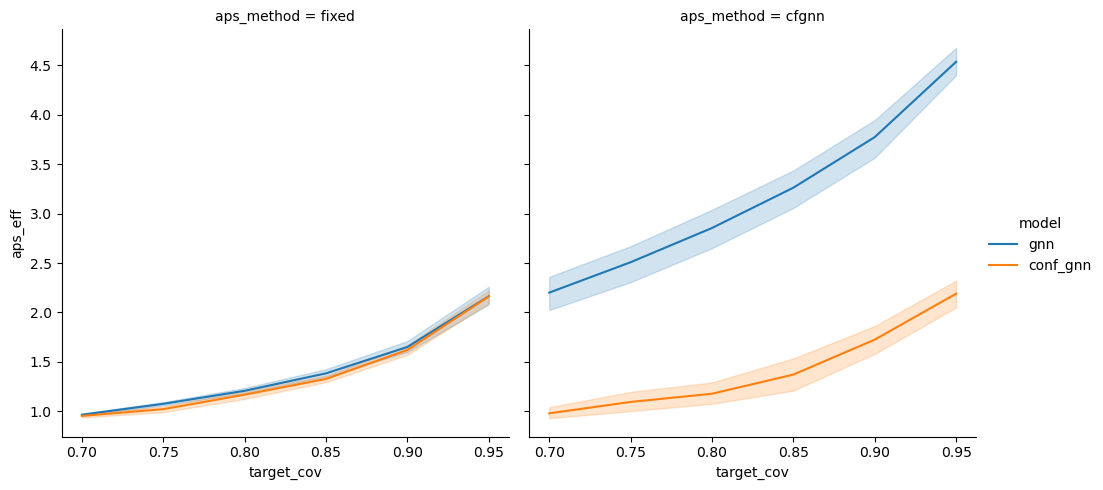

In [7]:
sns.relplot(res, x="target_cov", y="aps_eff", hue="model", col="aps_method", kind="line")

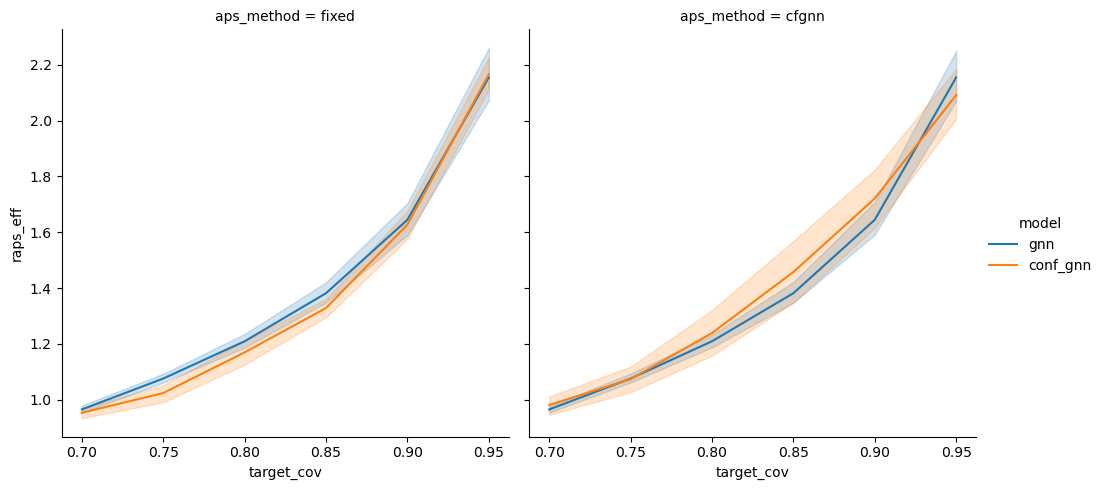

In [9]:
sns.relplot(res, x="target_cov", y="raps_eff", hue="model", col="aps_method", kind="line")

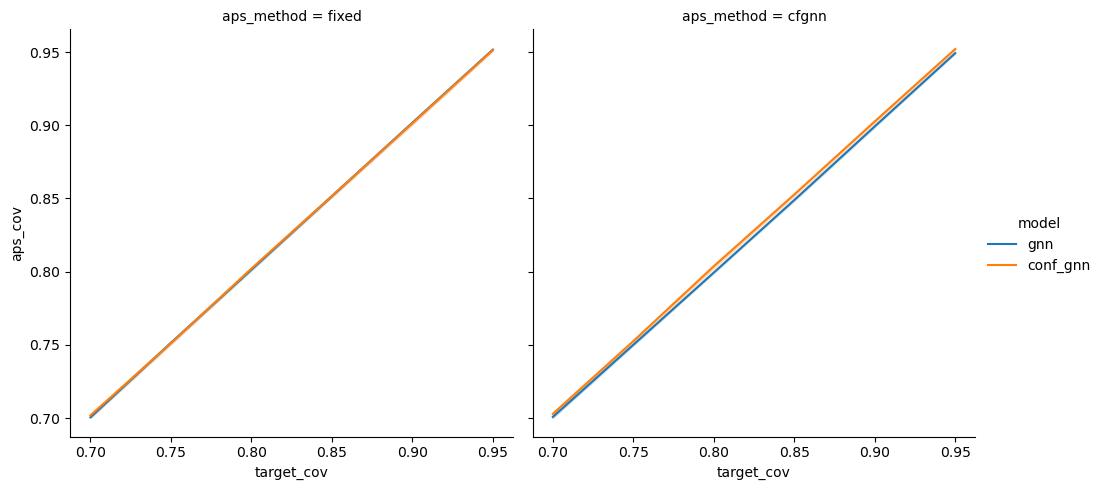

In [14]:
sns.relplot(res, x="target_cov", y="aps_cov", hue="model", col="aps_method", kind="line")